# Homework 1

## Solow Model


We consider here, another deterministic version of the neoclassical growth model, but propose a slightly different solution method.

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$.

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{c_t}{y_t}$ is constant over time.

__Create a structure `Parameters` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$__ 

In [1]:
struct Parameters
    β::Float64
    δ::Float64
    α::Float64
    γ::Int64
end

p=Parameters(0.96, 0.1,0.3,4)

β,δ,α,γ=p.β,p.δ,p.α,p.γ


(0.96, 0.1, 0.3, 4)

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

In [2]:
#if the saving rate is: $s=c_t/y_t$, 

# k_(t+1) = (1-δ)k_t+i

# the maxrimization program and the assumption that the saving rate is constant (s=c_t/y_t) should give us a formulation of investment i

# we have i_t=1/2(k_t)^α

__Define a function `f(k::Float64, p::Parameters)::Float64` to represent $f$ for a given calibration__

In [3]:
function f(k::Float64,p::Parameters)::Float64
    β,δ,α,γ=p.β,p.δ,p.α,p.γ
    k_ = (1-δ)k+(1/2)*k^α
    return k_
end

f(0.5,p)

0.8561261981781179

__Write a function `simulate(k0::Float64, T::Int, p::Parameters)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [4]:
function simulate(k0::Float64, T::Int, p::Parameters)::Vector{Float64}
    A=[]
    push!(A,k0)
    for t=1:T
        k1=f(k0,p)
        push!(A,k1)
        k0=k1
    end
    return A
end

#test with arbitrary values
T=100
A=simulate(0.001, T,p)
B=simulate(1000.00, T,p)

101-element Vector{Float64}:
 1000.0
  903.9716411736214
  817.4276317598237
  739.4234324023971
  669.1088443105998
  605.7185789365519
  548.5637705638228
  497.0243375183825
  450.54210714175235
  408.61462815199354
  370.78960165539814
  336.6598689452571
  305.8589004102455
    ⋮
   10.48248708709404
   10.446072463492529
   10.412243528633697
   10.380814369965007
   10.35161274519259
   10.32447903813681
   10.299265299184835
   10.275834362916545
   10.2540590361927
   10.23382135063289
   10.21501187398329
   10.197529075388019

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

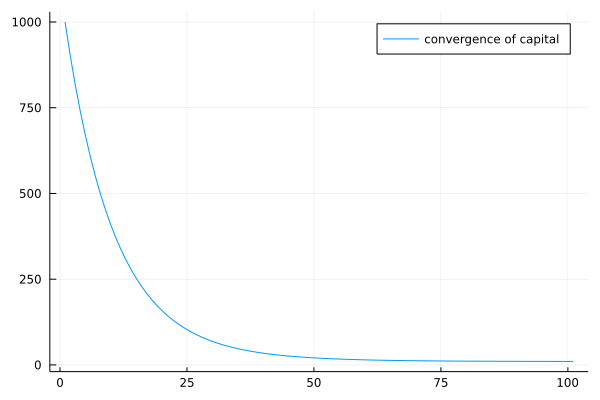

In [5]:
#Pkg.instantiate(Plots)
using Plots
pl = plot(x=1:T, [el for el in A], label="convergence of capital")
pl1 = plot(x=1:T, [el for el in B], label="convergence of capital")
#The steady state value seems to be around 9.96
#Very low-levels of initial capital entails rapid convergence during first-iterations
#Very high levels of initial capital also entails rapid convergence during first iterations


__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__

In [6]:
#we can actually compute steady state: it is the value of capital which satisfies f(k)=k
#computed with pen and paper, we can define the solution here to ease our computations
k_s=(2*δ)^(1/(α-1))

#convergence speed can be measured relying on distance to this steady state:
#given a tolerance error: in how much time do we outpass this tolerance threshold ?
#starting from the same initial capital is important
tol=0.01
k0=0.1

function convergence_speed(k::Float64,k_s::Float64,h::Function,p::Parameters,tol::Float64)::Int64
    t=0
    while max(k-k_s,k_s-k)>tol
        k_=h(k,p)
        k=k_
        t+=1
    end
    return t
end

S1=convergence_speed(k0, k_s,f,p,tol)

#Recall : steady state is given earlier in our code. 
#This convergence speed function only works for testing functions which have this precise value as a steady state !
#We could strengthen our code by computing function specific steady-state in our code, so it works with any function having a fixed point 

#to speed up convergence, we can implement learning:
function g(x::Float64,p::Parameters)::Float64
    λ=1.5
    x_= (1-λ)x + λ*f(x,p)
    return x_
end

#Recall that having λ>1 is the condition for acceleration ! here the exact value of 1.5 is arbitrary

S2=convergence_speed(k0, k_s,g,p,tol)



#We should be able to compare convergence speed of the two functions !

if S2<S1
    print("Function g converges faster than f! ",S2," steps instead of ",S1)
else
    print("Function f converges faster than g! ",S1," steps instead of ",S2)
end

#function simulate1(k0::Float64, T::Int, p::Parameters)::Vector{Float64}
#    A=[]
#    push!(A,k0)
#    for t=1:T
#        k1=g(k0,p)
#        push!(A,k1)
#        k0=k1
#    end
#    return A
#end
#T=50
#A1=simulate1(0.01, T,p)



Function g converges faster than f! 66 steps instead of 101

__Consider now the full intertemporal objective. Propose a function to approximate it numerically . Plot this objective as a function of the saving rate. Does it depend on the initial capital?__


In [15]:
#Define the full intertemporal objective
U(x, p) = x^(1-p.γ)/(1-p.γ)

#our assumption on the saving rate entails consumption equals investment. We have $$i_t=(1/2)k^α=c_t$$



U (generic function with 1 method)

__Use library Optim.jl to compute optimal saving. Plot it against initial capital. Bonus: compare the optimal steady-state level with the one you can evaluate in closed form.__

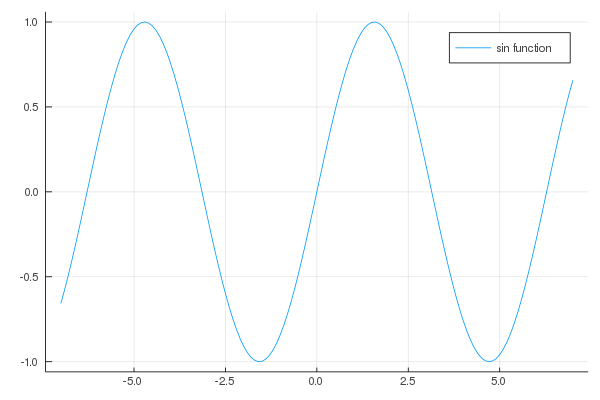

In [1]:
using Plots
gr(fmt=:png);
x = -7:7 # x points, coase grid
y = sin.(x) # corresponding y points
xf = -7:0.1:7 # fine grid
plot(xf, sin.(xf), label = "sin function")
#scatter!(x, y, label = "sampled data", markersize = 4)

## Deterministic Neoclassical Model: bruteforce

Model is exactly the same as in the last exercise, but now we look for a time-dependent saving rule, that is a different $s_t$ for each date. We will try to choose $s_t$ to maximize

$$\sum_{t = 0}^T \beta^t U(c_t) + \sum_{t = T+1}^{\infty} \beta^t U(c_T) $$

__Explain why the second term is important__

__Choose an horizon $T$ and write a function `objective(s, k0::Float64, T::Int, p::Parameters)` to compute the objective approximated with $T$ periods as a function of initial state `k0::Float64` and of the vector of saving rates `s::Vector` representing $(s_0, s_1, \cdots s_{T})$. Note that argument type of `s` is left unspecified to make it compatible with automatic differentiation.__

__Use library `Optim.jl` to maximize the utility function. If possible, find a way to specify derivatives of the objective function.__

## RBC Model with Dolo

__If needed, install Dolo, AxisArrays and DataFrames__

In [9]:
#]add DataFrames
#]add AxisArrays
#]add Dolo

LoadError: syntax: unexpected "]"

__Examine the `yaml` file `rbc.yaml`. It represents a basic version of the RBC model,
similar to the one seen in class.__

LoadError: UndefVarError: exam not defined

__What are the states (predetermined variables), what are the controls (to be determined), what are the exogenous variables?__

#states: productivity and capital
#control: consumption and work
#exogenous parameters: epsilon (gaussian error term)

__Compare the calibration from the yaml file, with the one given in the course. What is the specification for the utility function? ($U$ and $V$)__

In [ ]:
#the course slides specify utility as iso-elastic
#in the yaml file however, I don't get how it is specified

__Import the model. Inspect fields symbols and exogenous.__

In [17]:
model = yaml_import("rbc.yaml")

Model

In [19]:
model.symbols

Dict{Symbol, Vector{Symbol}} with 4 entries:
  :controls   => [:n, :i]
  :states     => [:z, :k]
  :exogenous  => [:epsilon]
  :parameters => [:beta, :sigma, :eta, :chi, :delta, :alpha, :rho, :zbar, :sig_…

`model.exogenous` is a julia object representing the random distribution driving the model

In [20]:
model.exogenous

Dolo.MvNormal([0.0], [1.0e-6])

In [21]:
# one can simulate 2 sets of simulations for 10 periods with
sim = Dolo.simulate(model.exogenous, 2, 10)

3-dimensional AxisArray{Float64,3,...} with axes:
    :V, 1:1
    :N, 1:2
    :T, 1:10
And data, a 1×2×10 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0

[:, :, 2] =
 -0.000485975  0.000651891

[:, :, 3] =
 0.00181944  -0.00107745

[:, :, 4] =
 -9.85051e-5  0.00203229

[:, :, 5] =
 -0.000584881  0.000120026

[:, :, 6] =
 -0.0010373  -0.00177034

[:, :, 7] =
 -0.000104031  0.000136368

[:, :, 8] =
 -0.000149787  -6.41204e-5

[:, :, 9] =
 -0.00139283  0.00105747

[:, :, 10] =
 0.00139204  -0.00108851

In [22]:
# the result is a special AxisArray object
# it is essentially a multidmensional array with labels on axes
# which is super useful to avoid reordering mistakes
sim[Axis{:V}(1), Axis{:N}(1)] 

LoadError: UndefVarError: Axis not defined

In [23]:
# Here is the first simulation as a regular vector
sim[Axis{:V}(1), Axis{:N}(1)].data

LoadError: UndefVarError: Axis not defined

__Check that the calibration given in the yaml file satisfies the steady-state__

In [24]:
# calibration, both for the parameters and the steady-state values is a dict-like object:
model.calibration

ModelCalibration(FlatCalibration(:sigma => 5.0, :n => 0.33, :zbar => 0.0, :beta => 0.99, :eta => 1.0, :epsilon => 0.0, :alpha => 0.33, :sig_z => 0.016, :rho => 0.8, :z => 0.0…), GroupedCalibration(:controls => [0.33, 0.23387445725364966], :states => [0.0, 9.354978290145986], :exogenous => [0.0], :parameters => [0.99, 5.0, 1.0, 23.95785990938192, 0.025, 0.33, 0.8, 0.0, 0.016]), Dict(:alpha => (:parameters, 6), :n => (:controls, 1), :rho => (:parameters, 7), :delta => (:parameters, 5), :eta => (:parameters, 3), :epsilon => (:exogenous, 1), :sigma => (:parameters, 2), :k => (:states, 2), :sig_z => (:parameters, 9), :z => (:states, 1)…), OrderedCollections.OrderedDict(:exogenous => [:epsilon], :states => [:z, :k], :controls => [:n, :i], :parameters => [:beta, :sigma, :eta, :chi, :delta, :alpha, :rho, :zbar, :sig_z]))

In [25]:
# which can behave in several ways:
model.calibration.flat

FlatCalibration with 21 entries:
  :sigma   => 5.0
  :n       => 0.33
  :zbar    => 0.0
  :beta    => 0.99
  :eta     => 1.0
  :epsilon => 0.0
  :alpha   => 0.33
  :sig_z   => 0.016
  :rho     => 0.8
  :z       => 0.0
  :delta   => 0.025
  :m       => 0.0
  :rk      => 0.035101
  :k       => 9.35498
  :y       => 0.995058
  :w       => 2.02027
  :i       => 0.233874
  :c       => 0.761184
  :chi     => 23.9579
  :u       => -2.04921
  :V       => -27.2881

In [26]:
model.calibration.grouped

GroupedCalibration with 4 entries:
  :controls   => [0.33, 0.233874]
  :states     => [0.0, 9.35498]
  :exogenous  => [0.0]
  :parameters => [0.99, 5.0, 1.0, 23.9579, 0.025, 0.33, 0.8, 0.0, 0.016]

In [27]:
# we get values of parameters and steady_state values
e, s, x, p = model.calibration[:exogenous, :states, :controls, :parameters]

4-element Vector{Vector{Float64}}:
 [0.0]
 [0.0, 9.354978290145986]
 [0.33, 0.23387445725364966]
 [0.99, 5.0, 1.0, 23.95785990938192, 0.025, 0.33, 0.8, 0.0, 0.016]

Denoting the vector of states by $s_t$, the vector of controls by $x_t$ and the vector of exogenous shocks by $e_t$, the *general specification* of a model in Dolo is:

$$\begin{eqnarray}
E_t \left[ f(e_t, s_t, x_t, e_{t+1}, s_{t+1}, x_{t+1}) \right] & = & 0 \\\\
s_t & = & g(e_{t-1}, s_{t-1}, x_{t-1}, e_t)
\end{eqnarray}$$

The are represented in the function  Dolo.arbitrage and Dolo.transition respectively.

In [28]:
Dolo.arbitrage(model,e,s,x,e,s,x,p) # this is all zero

2-element Vector{Float64}:
 -4.440892098500626e-16
  0.0

In [29]:
Dolo.transition(model, e,s,x,e,p) - s

2-element Vector{Float64}:
 0.0
 0.0

### Perturbation

Since the shock doesn't appear at date $t$ in the arbitrage function or at date $t-1$ in the transition equation, the first order dynamics can be characterized by:

$$\begin{eqnarray}
\mathbb{E}_t \left[ f^{\prime}_{s_t} \Delta s_t + f^{\prime}_{x_t} \Delta x_t + f^{\prime}_{e_{t+1}} e_{t+1} + f^{\prime}_{s_{t+1}} \Delta s_{t+1} + f^{\prime}_{x_{t+1}} \Delta x_{t+1} \right] & = & 0 \\\\
\Delta s_{t} & = & g^{\prime}_{s_{t-1}} \Delta s_{t-1} + g^{\prime}_{x_{t-1}} \Delta x_{t-1} + g^{\prime}_{e_t} e_{t}
\end{eqnarray}$$

Taking into account the fact the $e_{t+1}$ is zero mean it simplifies as:

$$\begin{eqnarray}
\mathbb{E}_t \left[ \underbrace{ f^{\prime}_{s_t}}_{A} \Delta s_t + \underbrace{f^{\prime}_{x_t}}_{B} \Delta x_t + \underbrace{f^{\prime}_{s_{t+1}}}_{C} \Delta s_{t+1} + \underbrace{ f^{\prime}_{x_{t+1}}}_{D}\Delta x_{t+1} \right] & = & 0 \\\\
\Delta s_{t} & = & \underbrace{g^{\prime}_{s_{t-1}}}_{E} \Delta s_{t-1} + \underbrace{g^{\prime}_{x_{t-1}}}_{F} \Delta x_{t-1} + \underbrace{g^{\prime}_{e_t}}_{Q} e_{t}
\end{eqnarray}$$

The solution of this system, is a matrix $X$ such that $\Delta x_t = X \Delta s_t$ satisfies the arbitrage equation for any $\Delta s_t$ (once the transition equation is susbtituted in).

__Compute derivatives A,B,C,D,E,F,Q using Dolo. Check that they have the right dimensions.__

In [64]:
A,B,C,D,E,F = Dolo.get_gf_derivatives(model)

([0.19999999999999996 0.0; 0.0 0.975], [0.0 0.0; 0.0 1.0], [11.18472759009141 0.3945450208706542; -6.536255055017396 -0.23056859153032638], [34.952444287180725 -13.270578445035316; -13.270578445035316 6.568716708345977], [0.0 0.0; 6.501505055017396 0.23305737336154927], [0.0 0.0; 13.200025414732286 -6.568716708345977])

In [62]:
Q = Dolo.get_ss_derivatives(model)[1][4] 
# slightly convoluted, admittedly, that is because get_ss returns (g_e, g_s, g_x, g_E), (f_e, f_s, f_x, f_E, F_S, f_X)

2×1 Array{Float64,2}:
 1.0
 0.0

In [116]:
@assert size(A) == (2,2) # 2 arbitrage equations x 2 states today

__Define a structure `PerturbedModel` to hold matrices A,B,C,D,E,F.__

In [117]:
struct PerturbedModel
    A::Matrix{Float64}
    B::Matrix{Float64}
    C::Matrix{Float64}
    D::Matrix{Float64}
    E::Matrix{Float64}
    F::Matrix{Float64}
    Q::Matrix{Float64}
end

pm = PerturbedModel(A,B,C,D,E,F,Q)

PerturbedModel([0.19999999999999996 0.0; 0.0 0.975], [0.0 0.0; 0.0 1.0], [11.18472759009141 0.3945450208706542; -6.536255055017396 -0.23056859153032638], [34.952444287180725 -13.270578445035316; -13.270578445035316 6.568716708345977], [0.0 0.0; 6.501505055017396 0.23305737336154927], [0.0 0.0; 13.200025414732286 -6.568716708345977], [1.0; 0.0])

__We look for a linear solution $x_t = X s_t$ where $X$ is a 2x2 matrix. Write the matrix equation which `X` must satisfy. Write a function `residual(X::Array, M::PerturbedModel)` which to the residual of this equation for a given `X`.__


__Write a function `T(X, M::PerturbedModel)`  which implements the time iteration step.__

__Write function `linear_time_iteration(X_0::Matrix, m::PerturbedModel)::Matrix` which implements the time iteration algorithm. Apply it to `X0 = rand(1,2)` and check that the result satisfies the first order model.__

    

__Define two linear operators `L_S(S::Matrix, X_0::Matrix, m::PerturbedModel)::Matrix` and `L_T(S::Matrix, X_0::Matrix, m::PerturbedModel)::Matrix` which implement the derivatives of the simulation and the time-iteration operator respectively.__

__Implement a function `spectral_radius(f::Function)::Float64` which implements the power iteration method to compute the biggest eigenvalues of the two previously defined operators. Check that Blamnchard-Kahn conditions are met.__

__Compare the solution with the one obtained by dolo__

In [98]:
sol_dolo = Dolo.perturb(model)

Perturbation Results
 * Decision Rule type: Dolo.BiTaylorExpansion{2}
 * stable < true
 * determined < true


In [103]:
X_dolo = sol_dolo.dr.x_s

2×2 Array{Float64,2}:
 0.207879  -0.0152809
 1.39034   -0.0105166

__Compute the transition matrix $P = E + F X$__

__Create a structure to hold the solution__

In [107]:
struct Solution
    X::Matrix{Float64}
    P::Matrix{Float64}  # transition matrix
    Q::Matrix{Float64}
    shock               # set it to model.exogenous
end

__Write a function `simulate(s0::Vector, sol::Solution, T::Int64)::Tuple{Matrix, Matrix}` to simulate the model over $T$ periods (by using the formula $\Delta s_t = P s_{t-1} + Q e_t$. Return a matrix for the states (one line per date) and another matrix for the controls. Use Dolo.simulation(sol.shock) to simulate the exogenous shock.__

__Bonus: add a keyword option to compute variables levels or log-deviations. If possible, return a DataFrame or an AxisArrays object.__

__Write a function response(sol::Solution, T::Int64, δ::Float64) which computes the deterministic response of a model, followint an initial deviation of the shock δ.__

__Bonus: Introduce a 10% income tax in the model, by editing the yaml file. How does it affect the responses of the model's variables?__